# Prediction with genetic algorithms and correction with probabilistic rules

This notebook gathers the results for the predictions made on the multi-objective genetic algorithms, considering a binary threshold of 30, and the later correction using probabilistic rules.

### Brief explanation

With the already chosen best models, we predicted hypometabolism for the patients in our database. By predicting each brain region independently, we created a whole brain map. However, and since variability was a big deal in some regions, we performed 10 predictions per region, which led to 10 different brain maps. For each of them, absolute and normalised probabilistic rules were applied. Eventually, consensus brain maps were calculated before and after rule application. The relevance threshold, which determines how strict we are in considering rules, has been set as a parameter varying from 0.5 to 1.

### Import the packages

We import the packages that will be needed. In this case, everything is already contained in the prtools.py file.

In [1]:
import matplotlib
import seaborn
import warnings
import sys
sys.path.insert(0,'../../Tools')
from orderedlist import *
from prtools import *
da = Datasets()
ra = RuleApplication()

In [2]:
warnings.filterwarnings('ignore')
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

### Preparation of results

#### General stuff

In [3]:
real_aal = da.define_binary(pandas.read_csv('../../Data/Y_aal_quan.csv'),30)
real_brodmann = da.define_binary(pandas.read_csv('../../Data/Y_brodmann_quan.csv'),30)
prediction_aal = pandas.read_csv('./Prediction_multi_30/Prediction/prediction_aal.csv')
prediction_brodmann = pandas.read_csv('./Prediction_multi_30/Prediction/prediction_brodmann.csv')

In [4]:
relevance_thresholds_absolute = [1,0.975,0.950,0.925,0.9,0.8,0.7,0.6,0.5]
relevance_thresholds_normalised = [0.9,0.8,0.7,0.6,0.5]

In [5]:
aal_list.remove('f1mo_l')
aal_list.remove('f1mo_r')

#### Absolute rules

In [6]:
comparison_absolute_aal = ra.compare_with_real(prediction_aal,real_aal)
comparison_absolute_brodmann = ra.compare_with_real(prediction_brodmann,real_brodmann)
index = ['Prediction']
for relevance_threshold in relevance_thresholds_absolute:
    absolute_aal = pandas.read_csv('./Prediction_multi_30/Absolute/correction_aal_'+str(relevance_threshold)+'.csv')
    absolute_brodmann = pandas.read_csv('./Prediction_multi_30/Absolute/correction_brodmann_'+str(relevance_threshold)+'.csv')
    comparison_absolute_aal = pandas.concat([comparison_absolute_aal,ra.compare_with_real(absolute_aal,real_aal)],axis=0)
    comparison_absolute_brodmann = pandas.concat([comparison_absolute_brodmann,ra.compare_with_real(absolute_brodmann,real_brodmann)],axis=0)
    index.append('Relevance threshold = '+str(relevance_threshold))
comparison_absolute_aal.index = index
comparison_absolute_brodmann.index = index

In [7]:
TFP_absolute_aal = comparison_absolute_aal[['TP','FP']].transpose()
TFP_absolute_brodmann = comparison_absolute_brodmann[['TP','FP']].transpose()
added_absolute_aal = []
added_absolute_brodmann = []
for relevance_threshold in relevance_thresholds_absolute:
        temp_TFP_aal = TFP_absolute_aal['Relevance threshold = '+str(relevance_threshold)]-TFP_absolute_aal['Prediction']
        temp_TFP_brodmann = TFP_absolute_brodmann['Relevance threshold = '+str(relevance_threshold)]-TFP_absolute_brodmann['Prediction']
        added_absolute_aal.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_aal[0]+temp_TFP_aal[1])+' regions were marked as hypometabolic: '+str(temp_TFP_aal[0])+' correctly ('+str(round(temp_TFP_aal[0]*100/(temp_TFP_aal[0]+temp_TFP_aal[1]),2))+' %) and '+str(temp_TFP_aal[1])+' incorrectly')
        added_absolute_brodmann.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_brodmann[0]+temp_TFP_brodmann[1])+' regions were marked as hypometabolic: '+str(temp_TFP_brodmann[0])+' correctly ('+str(round(temp_TFP_brodmann[0]*100/(temp_TFP_brodmann[0]+temp_TFP_brodmann[1]),2))+' %) and '+str(temp_TFP_brodmann[1])+' incorrectly')

In [8]:
correct_absolute_aal_regions = pandas.DataFrame()
percentage_absolute_aal_regions = pandas.DataFrame()
for task in aal_list:
    try:
        corrects = []
        percentages = []
        to_compare = ra.compare_with_real(prediction_aal[[task]],real_aal[[task]])
        for relevance_threshold in relevance_thresholds_absolute:
            absolute_aal = pandas.read_csv('./Prediction_multi_30/Absolute/correction_aal_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(absolute_aal[[task]],real_aal[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_absolute_aal_regions = pandas.concat([correct_absolute_aal_regions,temp_corrects],axis=1)
        except: correct_absolute_aal_regions = temp_corrects
        try: percentage_absolute_aal_regions = pandas.concat([percentage_absolute_aal_regions,temp_percentages],axis=1)
        except: percentage_absolute_aal_regions = temp_percentages
    except: pass
correct_absolute_aal_regions.index = relevance_thresholds_absolute
percentage_absolute_aal_regions.index = relevance_thresholds_absolute

In [9]:
correct_absolute_brodmann_regions = pandas.DataFrame()
percentage_absolute_brodmann_regions = pandas.DataFrame()
for task in brodmann_list:
    try:
        to_compare = ra.compare_with_real(prediction_brodmann[[task]],real_brodmann[[task]])
        corrects = []
        percentages = []
        for relevance_threshold in relevance_thresholds_absolute:
            absolute_brodmann = pandas.read_csv('./Prediction_multi_30/Absolute/correction_brodmann_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(absolute_brodmann[[task]],real_brodmann[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_absolute_brodmann_regions = pandas.concat([correct_absolute_brodmann_regions,temp_corrects],axis=1)
        except: correct_absolute_brodmann_regions = temp_corrects
        try: percentage_absolute_brodmann_regions = pandas.concat([percentage_absolute_brodmann_regions,temp_percentages],axis=1)
        except: percentage_absolute_brodmann_regions = temp_percentages
    except:pass
correct_absolute_brodmann_regions.index = relevance_thresholds_absolute
percentage_absolute_brodmann_regions.index = relevance_thresholds_absolute

#### Normalised rules

In [10]:
comparison_normalised_aal = ra.compare_with_real(prediction_aal,real_aal)
comparison_normalised_brodmann = ra.compare_with_real(prediction_brodmann,real_brodmann)
index = ['Prediction']
for relevance_threshold in relevance_thresholds_normalised:
    normalised_aal = pandas.read_csv('./Prediction_multi_30/Normalised/correction_aal_'+str(relevance_threshold)+'.csv')
    normalised_brodmann = pandas.read_csv('./Prediction_multi_30/Normalised/correction_brodmann_'+str(relevance_threshold)+'.csv')
    comparison_normalised_aal = pandas.concat([comparison_normalised_aal,ra.compare_with_real(normalised_aal,real_aal)],axis=0)
    comparison_normalised_brodmann = pandas.concat([comparison_normalised_brodmann,ra.compare_with_real(normalised_brodmann,real_brodmann)],axis=0)
    index.append('Relevance threshold = '+str(relevance_threshold))
comparison_normalised_aal.index = index
comparison_normalised_brodmann.index = index

In [11]:
TFP_normalised_aal = comparison_normalised_aal[['TP','FP']].transpose()
TFP_normalised_brodmann = comparison_normalised_brodmann[['TP','FP']].transpose()
added_normalised_aal = []
added_normalised_brodmann = []
for relevance_threshold in relevance_thresholds_normalised:
        temp_TFP_aal = TFP_normalised_aal['Relevance threshold = '+str(relevance_threshold)]-TFP_normalised_aal['Prediction']
        temp_TFP_brodmann = TFP_normalised_brodmann['Relevance threshold = '+str(relevance_threshold)]-TFP_normalised_brodmann['Prediction']
        added_normalised_aal.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_aal[0]+temp_TFP_aal[1])+' regions were marked as hypometabolic: '+str(temp_TFP_aal[0])+' correctly ('+str(round(temp_TFP_aal[0]*100/(temp_TFP_aal[0]+temp_TFP_aal[1]),2))+' %) and '+str(temp_TFP_aal[1])+' incorrectly')
        added_normalised_brodmann.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_brodmann[0]+temp_TFP_brodmann[1])+' regions were marked as hypometabolic: '+str(temp_TFP_brodmann[0])+' correctly ('+str(round(temp_TFP_brodmann[0]*100/(temp_TFP_brodmann[0]+temp_TFP_brodmann[1]),2))+' %) and '+str(temp_TFP_brodmann[1])+' incorrectly')

In [12]:
correct_normalised_aal_regions = pandas.DataFrame()
percentage_normalised_aal_regions = pandas.DataFrame()
for task in aal_list:
    try:
        corrects = []
        percentages = []
        to_compare = ra.compare_with_real(prediction_aal[[task]],real_aal[[task]])
        for relevance_threshold in relevance_thresholds_normalised:
            normalised_aal = pandas.read_csv('./Prediction_multi_30/Normalised/correction_aal_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(normalised_aal[[task]],real_aal[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_normalised_aal_regions = pandas.concat([correct_normalised_aal_regions,temp_corrects],axis=1)
        except: correct_normalised_aal_regions = temp_corrects
        try: percentage_normalised_aal_regions = pandas.concat([percentage_normalised_aal_regions,temp_percentages],axis=1)
        except: percentage_normalised_aal_regions = temp_percentages
    except: pass
correct_normalised_aal_regions.index = relevance_thresholds_normalised
percentage_normalised_aal_regions.index = relevance_thresholds_normalised

In [13]:
correct_normalised_brodmann_regions = pandas.DataFrame()
percentage_normalised_brodmann_regions = pandas.DataFrame()
for task in brodmann_list:
    try:
        to_compare = ra.compare_with_real(prediction_brodmann[[task]],real_brodmann[[task]])
        corrects = []
        percentages = []
        for relevance_threshold in relevance_thresholds_normalised:
            normalised_brodmann = pandas.read_csv('./Prediction_multi_30/Normalised/correction_brodmann_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(normalised_brodmann[[task]],real_brodmann[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_normalised_brodmann_regions = pandas.concat([correct_normalised_brodmann_regions,temp_corrects],axis=1)
        except: correct_normalised_brodmann_regions = temp_corrects
        try: percentage_normalised_brodmann_regions = pandas.concat([percentage_normalised_brodmann_regions,temp_percentages],axis=1)
        except: percentage_normalised_brodmann_regions = temp_percentages
    except:pass
correct_normalised_brodmann_regions.index = relevance_thresholds_normalised
percentage_normalised_brodmann_regions.index = relevance_thresholds_normalised

#### Random rules

In [14]:
FN_aal = comparison_absolute_aal.loc['Prediction']['FN']
TFN_aal = comparison_absolute_aal.loc['Prediction']['FN'] + comparison_absolute_aal.loc['Prediction']['TN']
FN_brodmann = comparison_absolute_brodmann.loc['Prediction']['FN']
TFN_brodmann = comparison_absolute_brodmann.loc['Prediction']['FN'] + comparison_absolute_brodmann.loc['Prediction']['TN']
random_aal = str(round((FN_aal*100/TFN_aal),2))+' %'
random_brodmann = str(round((FN_brodmann*100/TFN_brodmann),2))+' %'

### Results

#### AAL atlas (90 regions)

##### Using random corrector

A program that randomly changes negative labels to positive labels in our predicted dataset would label correctly what percentage of values?

In [15]:
print(random_aal)

5.83 %


##### Using absolute rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [16]:
comparison_absolute_aal

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,3146,22523,2817,1394,0.859,0.599,0.528,0.693
Relevance threshold = 1,3160,22490,2850,1380,0.858,0.599,0.526,0.696
Relevance threshold = 0.975,3307,21915,3425,1233,0.844,0.587,0.491,0.728
Relevance threshold = 0.95,3307,21915,3425,1233,0.844,0.587,0.491,0.728
Relevance threshold = 0.925,3325,21837,3503,1215,0.842,0.585,0.487,0.732
Relevance threshold = 0.9,3426,21506,3834,1114,0.834,0.581,0.472,0.755
Relevance threshold = 0.8,3611,20456,4884,929,0.805,0.554,0.425,0.795
Relevance threshold = 0.7,3850,18597,6743,690,0.751,0.509,0.363,0.848
Relevance threshold = 0.6,4047,16293,9047,493,0.681,0.459,0.309,0.891
Relevance threshold = 0.5,4169,14193,11147,371,0.615,0.420,0.272,0.918


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [17]:
for i in added_absolute_aal: print(i)

With a relevance threshold of 1, 47 regions were marked as hypometabolic: 14 correctly (29.79 %) and 33 incorrectly
With a relevance threshold of 0.975, 769 regions were marked as hypometabolic: 161 correctly (20.94 %) and 608 incorrectly
With a relevance threshold of 0.95, 769 regions were marked as hypometabolic: 161 correctly (20.94 %) and 608 incorrectly
With a relevance threshold of 0.925, 865 regions were marked as hypometabolic: 179 correctly (20.69 %) and 686 incorrectly
With a relevance threshold of 0.9, 1297 regions were marked as hypometabolic: 280 correctly (21.59 %) and 1017 incorrectly
With a relevance threshold of 0.8, 2532 regions were marked as hypometabolic: 465 correctly (18.36 %) and 2067 incorrectly
With a relevance threshold of 0.7, 4630 regions were marked as hypometabolic: 704 correctly (15.21 %) and 3926 incorrectly
With a relevance threshold of 0.6, 7131 regions were marked as hypometabolic: 901 correctly (12.63 %) and 6230 incorrectly
With a relevance thresho

Down below we show the **effect that the application of rules have over each of the predicted regions**.

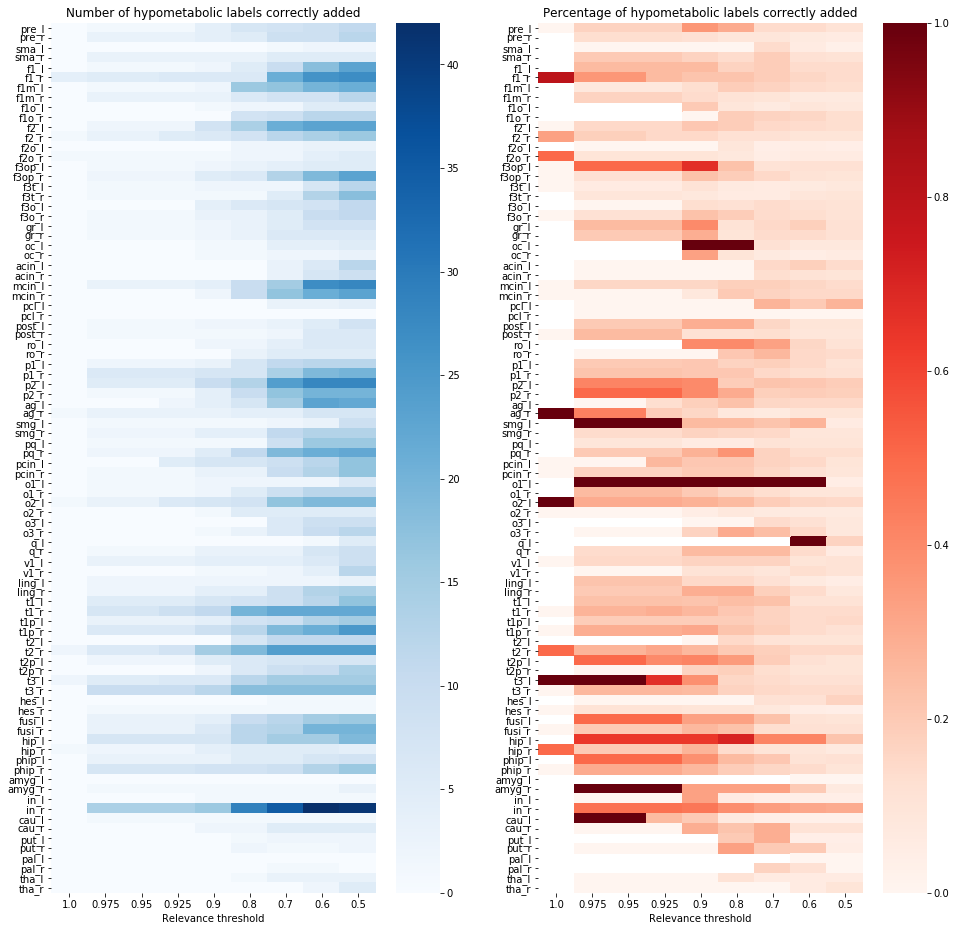

In [18]:
matplotlib.rcParams['figure.figsize'] = (16,16)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_absolute_aal_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_absolute_aal_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

##### Using normalised rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [19]:
comparison_normalised_aal

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,3146,22523,2817,1394,0.859,0.599,0.528,0.693
Relevance threshold = 0.9,3222,22267,3073,1318,0.853,0.595,0.512,0.710
Relevance threshold = 0.8,3226,22253,3087,1314,0.853,0.594,0.511,0.711
Relevance threshold = 0.7,3260,22058,3282,1280,0.847,0.588,0.498,0.718
Relevance threshold = 0.6,3385,21339,4001,1155,0.827,0.568,0.458,0.746
Relevance threshold = 0.5,3481,20641,4699,1059,0.807,0.547,0.426,0.767


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [20]:
for i in added_normalised_aal: print(i)

With a relevance threshold of 0.9, 332 regions were marked as hypometabolic: 76 correctly (22.89 %) and 256 incorrectly
With a relevance threshold of 0.8, 350 regions were marked as hypometabolic: 80 correctly (22.86 %) and 270 incorrectly
With a relevance threshold of 0.7, 579 regions were marked as hypometabolic: 114 correctly (19.69 %) and 465 incorrectly
With a relevance threshold of 0.6, 1423 regions were marked as hypometabolic: 239 correctly (16.8 %) and 1184 incorrectly
With a relevance threshold of 0.5, 2217 regions were marked as hypometabolic: 335 correctly (15.11 %) and 1882 incorrectly


Down below we show the **effect that the application of rules have over each of the predicted regions**.

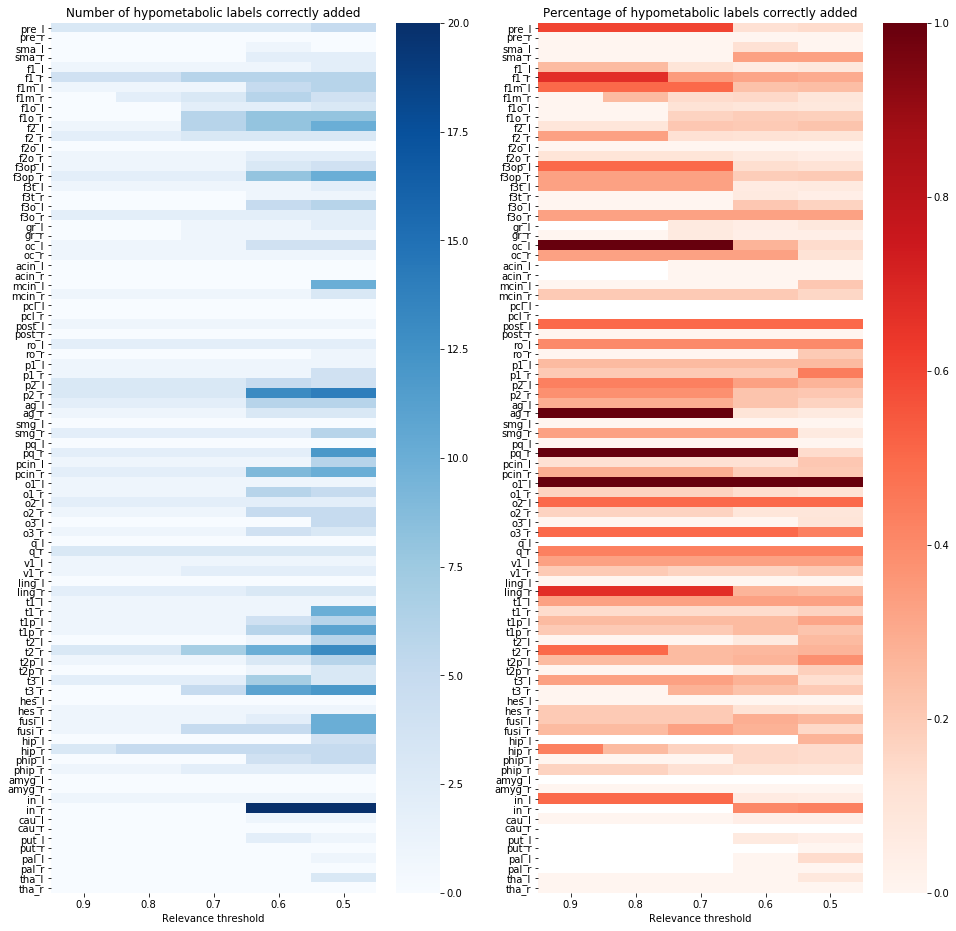

In [21]:
matplotlib.rcParams['figure.figsize'] = (16,16)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_normalised_aal_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_normalised_aal_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

#### Brodmann atlas (47 regions)

##### Using random corrector

A program that randomly changes negative labels to positive labels in our predicted dataset would label correctly what percentage of values?

In [22]:
print(random_brodmann)

4.89 %


##### Using absolute rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [23]:
comparison_absolute_brodmann

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,1671,12000,1316,617,0.876,0.634,0.559,0.730
Relevance threshold = 1,1692,11979,1337,596,0.876,0.636,0.559,0.740
Relevance threshold = 0.975,1816,11589,1727,472,0.859,0.623,0.513,0.794
Relevance threshold = 0.95,1818,11580,1736,470,0.859,0.622,0.512,0.795
Relevance threshold = 0.925,1831,11557,1759,457,0.858,0.623,0.510,0.800
Relevance threshold = 0.9,1863,11423,1893,425,0.851,0.616,0.496,0.814
Relevance threshold = 0.8,1943,10998,2318,345,0.829,0.593,0.456,0.849
Relevance threshold = 0.7,1999,10544,2772,289,0.804,0.566,0.419,0.874
Relevance threshold = 0.6,2057,10076,3240,231,0.778,0.542,0.388,0.899
Relevance threshold = 0.5,2091,9690,3626,197,0.755,0.522,0.366,0.914


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [24]:
for i in added_absolute_brodmann: print(i)

With a relevance threshold of 1, 42 regions were marked as hypometabolic: 21 correctly (50.0 %) and 21 incorrectly
With a relevance threshold of 0.975, 556 regions were marked as hypometabolic: 145 correctly (26.08 %) and 411 incorrectly
With a relevance threshold of 0.95, 567 regions were marked as hypometabolic: 147 correctly (25.93 %) and 420 incorrectly
With a relevance threshold of 0.925, 603 regions were marked as hypometabolic: 160 correctly (26.53 %) and 443 incorrectly
With a relevance threshold of 0.9, 769 regions were marked as hypometabolic: 192 correctly (24.97 %) and 577 incorrectly
With a relevance threshold of 0.8, 1274 regions were marked as hypometabolic: 272 correctly (21.35 %) and 1002 incorrectly
With a relevance threshold of 0.7, 1784 regions were marked as hypometabolic: 328 correctly (18.39 %) and 1456 incorrectly
With a relevance threshold of 0.6, 2310 regions were marked as hypometabolic: 386 correctly (16.71 %) and 1924 incorrectly
With a relevance threshold 

Down below we show the **effect that the application of rules have over each of the predicted regions**.

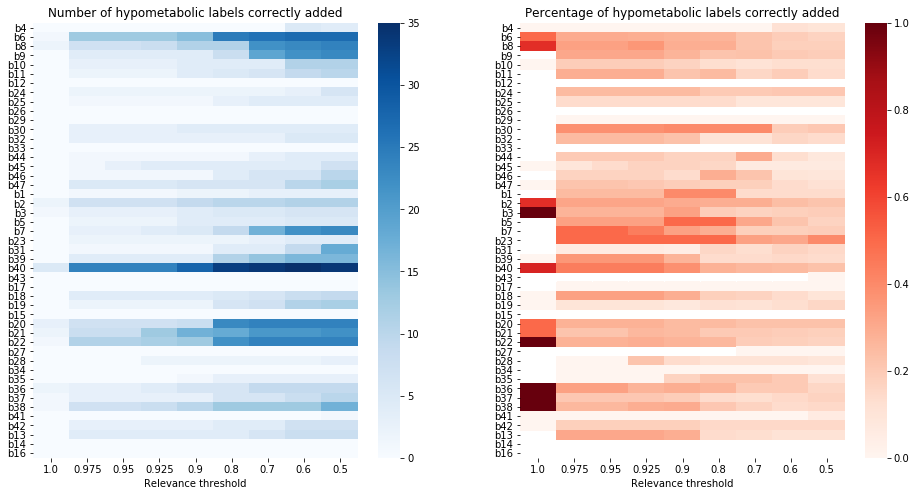

In [25]:
matplotlib.rcParams['figure.figsize'] = (16,8)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_absolute_brodmann_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_absolute_brodmann_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

##### Using normalised rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [26]:
comparison_normalised_brodmann

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,1671,12000,1316,617,0.876,0.634,0.559,0.730
Relevance threshold = 0.9,1714,11920,1396,574,0.874,0.635,0.551,0.749
Relevance threshold = 0.8,1720,11909,1407,568,0.873,0.635,0.550,0.752
Relevance threshold = 0.7,1779,11714,1602,509,0.865,0.628,0.526,0.778
Relevance threshold = 0.6,1821,11438,1878,467,0.850,0.608,0.492,0.796
Relevance threshold = 0.5,1846,11240,2076,442,0.839,0.595,0.471,0.807


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [27]:
for i in added_normalised_brodmann: print(i)

With a relevance threshold of 0.9, 123 regions were marked as hypometabolic: 43 correctly (34.96 %) and 80 incorrectly
With a relevance threshold of 0.8, 140 regions were marked as hypometabolic: 49 correctly (35.0 %) and 91 incorrectly
With a relevance threshold of 0.7, 394 regions were marked as hypometabolic: 108 correctly (27.41 %) and 286 incorrectly
With a relevance threshold of 0.6, 712 regions were marked as hypometabolic: 150 correctly (21.07 %) and 562 incorrectly
With a relevance threshold of 0.5, 935 regions were marked as hypometabolic: 175 correctly (18.72 %) and 760 incorrectly


Down below we show the **effect that the application of rules have over each of the predicted regions**.

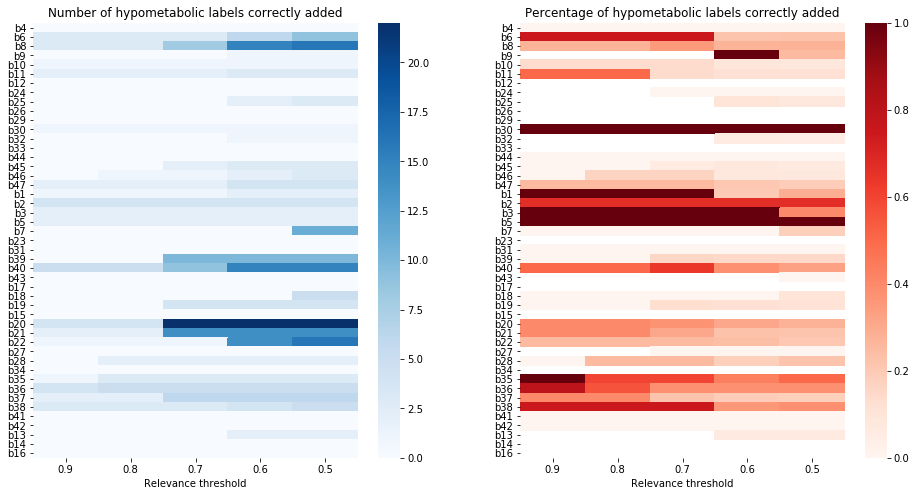

In [28]:
matplotlib.rcParams['figure.figsize'] = (16,8)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_normalised_brodmann_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_normalised_brodmann_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

### Conclusions

In order to measure the validity of our rules, it is important to know what result should we expect if we did random changes from negative labels to positive labels in our predicted datasets. As we have seen, it would be expected that only 5-6% of values are correctly labelled. This low percentage can be explained by two facts. First, the percentage of positive labels is by itself very low in the real dataset (15%). Second, our models have already predicted correctly part of this positive labels, which mean that only very few remain available for correction. Taking this into consideration, it is evident that **our rules perform better than a random generator would do**. Even so, **incorrect modifications are more common than correct modifications**, which explains why accuracy and precision always fall. Recall, on the other hand, can only improve. 

**As we consider lower relevance thresholds**, we allow more rules and more modifications to be considered. When the number of modifications is low, they tend to be more accurate; when the number of modifications is high, they tend to be less accurate. The consequence is that **recall increase while accuracy and precision decrease**. **As for the two different type of rules**, normalised rules result in less changes being made, which makes sense because we are being more strict. However, **absolute rules usually perform better at similar magnitudes**. The explanation is that normalised rules are very useful from the clinical point of view, but a pure data driven mechanism is expected to yield better metrics.

Eventually, if we focus in the correction region by region, it is clear that absolute rules will lead regions with already high levels of hypometabolism to show more changes. This explains why we see blocks where the rules appear to have a greater impact. In the other hand, normalised rules show more realistic relations. Looking at them, we can see that **certain regions appear to be more affected than others by the rules**; these are: P2 (L), T2 (R), T3 (R), IN (R), B8, B40, B20, B21, B22. To the moment we have only referred to the number of correct changes. In terms of percentage of correct changes, some regions that stand out are: PRE (L), F1 (R), OC (L), POST (L), AG (L), PQ (R), LING (R), B6, B30, B1, B2, B3, B5, B40, B38.

So, why are we struggling with correctly modifying non-hipometabolism to hipometabolism? 

- **Rules are very simple, which brings uncertainty**: in the rule '*if A is hypometabolic, then B is hypometabolic with a probability of 0.6*' we know the rule can be applied in 60% of cases but we don't know which cases they are; therefore, we may apply it when not needed or not apply it when needed.
- **We are in a very difficult scenario**: many positive labels have already been predicted correctly with our models, so what is left are the difficult cases. 
- **We are in a very unstable scenario**: the models predicted wrongly in some cases, so the rules are acting over uncertain prior knowledge.